In [2]:
import numpy as np
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

import json

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import Normalize
from matplotlib import cm

import matplotlib as mpl 
import matplotlib.patheffects as path_effects
import datetime
from highlight_text import fig_text, ax_text
import matplotlib.image as mpimg
from PIL import Image

In [3]:
base_url = 'https://understat.com/league'
leagues = [
    'La_liga', 'EPL', 'Bundesliga', 
    'Serie_A', 'Ligue_1', 'RFPL'
]
seasons = [
    '2014', '2015', '2016',
    '2017', '2018', '2019',
    '2020', '2021', "2122", 
    "2223"
]

In [4]:
url = base_url + '/' + leagues[0] + '/' + seasons[-1]
html = requests.get(url)
soup = BeautifulSoup(html.content, 'lxml')
scripts = soup.find_all('script')

In [5]:
string_with_json_obj = scripts[2].string
ind_start = string_with_json_obj.index("('")+2
ind_end = string_with_json_obj.index("')")
json_data = string_with_json_obj[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [6]:
teams = {}
for _id in data.keys():
    teams[_id] = data[_id]['title']
    
columns = []
values = []
for _id in data.keys():
    columns = list(data[_id]['history'][0].keys())
    values = list(data[_id]['history'][0].values())
    break
    
teams

{'138': 'Sevilla',
 '140': 'Real Sociedad',
 '141': 'Espanyol',
 '142': 'Getafe',
 '143': 'Atletico Madrid',
 '145': 'Rayo Vallecano',
 '146': 'Valencia',
 '147': 'Athletic Club',
 '148': 'Barcelona',
 '150': 'Real Madrid',
 '152': 'Celta Vigo',
 '153': 'Real Betis',
 '154': 'Villarreal',
 '157': 'Osasuna',
 '207': 'Elche',
 '208': 'Almeria',
 '223': 'Girona',
 '231': 'Real Valladolid',
 '239': 'Mallorca',
 '261': 'Cadiz'}

In [8]:
barcelona_data = []
for row in data['148']['history']:
    barcelona_data.append(row.values())
df_barca = pd.DataFrame(barcelona_data, columns=columns)
df_barca.head()

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,h,1.37129,0.771530,1.37129,0.771530,"{'att': 146, 'def': 33}","{'att': 351, 'def': 30}",11,3,0,0,1.8110,d,2022-08-13 19:00:00,0,1,0,1,0.599760
1,a,2.04035,0.799130,2.04035,0.799130,"{'att': 218, 'def': 26}","{'att': 341, 'def': 28}",9,4,4,1,2.2957,w,2022-08-21 20:00:00,1,0,0,3,1.241220
2,h,3.28674,0.720063,3.28674,0.720063,"{'att': 182, 'def': 24}","{'att': 295, 'def': 13}",21,2,4,0,2.7808,w,2022-08-28 17:30:00,1,0,0,3,2.566677
3,a,4.67838,0.829157,4.67838,0.829157,"{'att': 202, 'def': 23}","{'att': 237, 'def': 31}",8,8,3,0,2.9625,w,2022-09-03 19:00:00,1,0,0,3,3.849223
4,a,2.66856,0.248180,2.66856,0.248180,"{'att': 99, 'def': 17}","{'att': 297, 'def': 25}",9,1,4,0,2.8680,w,2022-09-10 16:30:00,1,0,0,3,2.420380


In [9]:
real_data = []
for row in data['150']['history']:
    real_data.append(row.values())
df_real = pd.DataFrame(real_data, columns=columns)
df_real.head()

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,a,3.11412,0.800730,3.11412,0.800730,"{'att': 199, 'def': 10}","{'att': 322, 'def': 10}",17,2,2,1,2.6728,w,2022-08-14 20:00:00,1,0,0,3,2.313390
1,a,3.59631,1.319730,1.98821,0.576454,"{'att': 317, 'def': 25}","{'att': 312, 'def': 25}",4,9,4,1,2.7467,w,2022-08-20 20:00:00,1,0,0,3,1.411756
2,a,2.04602,1.633590,2.04602,1.633590,"{'att': 143, 'def': 14}","{'att': 326, 'def': 13}",10,11,3,1,1.6438,w,2022-08-28 20:00:00,1,0,0,3,0.412430
3,h,3.20593,0.333406,3.20593,0.333406,"{'att': 308, 'def': 30}","{'att': 254, 'def': 18}",17,4,2,1,2.9052,w,2022-09-03 14:15:00,1,0,0,3,2.872524
4,h,2.21791,0.950984,2.21791,0.950984,"{'att': 181, 'def': 17}","{'att': 260, 'def': 16}",16,1,4,1,2.2598,w,2022-09-11 12:00:00,1,0,0,3,1.266926


In [165]:
dataframes = {}
for id, team in teams.items():
    teams_data = []
    for row in data[id]['history']:
        teams_data.append(list(row.values()))
    df = pd.DataFrame(teams_data, columns=columns)
    dataframes[team] = df

In [166]:
for team, df in dataframes.items():
    dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def']!=0 else 0)
    dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)

In [16]:
cols_to_sum = ['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD'] 
cols_to_mean = ['ppda_coef', 'oppda_coef']

In [17]:
frames = [] 
for team, df in dataframes.items(): 
    sum_data = pd.DataFrame(df[cols_to_sum].sum()).transpose()
    mean_data = pd.DataFrame(df[cols_to_mean].mean()).transpose()
    final_df = sum_data.join(mean_data) 
    final_df['team'] = team
    final_df['matches'] = len(df) 
    frames.append(final_df) 
full_stat = pd.concat(frames)

In [18]:
full_stat = full_stat[['team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts']]
full_stat.sort_values('pts', ascending=False, inplace=True)
full_stat.reset_index(inplace=True, drop=True)
full_stat['position'] = range(1,len(full_stat)+1)

In [19]:
full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored'] 
full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed'] 
full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']

In [20]:
cols_to_int = ['wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'deep', 'deep_allowed'] 
full_stat[cols_to_int] = full_stat[cols_to_int].astype(int)

In [21]:
col_order = ['position','team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts', 'xpts_diff'] 
full_stat = full_stat[col_order] 
full_stat.columns = ['#', 'team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xG_diff', 'NPxG', 'xGA', 'xGA_diff', 'NPxGA', 'NPxGD', 'PPDA', 'OPPDA', 'DC', 'ODC', 'xPTS', 'xPTS_diff'] 
pd.options.display.float_format = '{:,.2f}'.format 
full_stat.head()
full_stat.to_csv(f'/work/assets/understats/seasonStat/liga2021.csv')

In [167]:
# df_barca = df
df_barca = dataframes["Barcelona"]
df_barca['xG_diff'] = df_barca['xG'] - df_barca['scored']
df_barca['xGA_diff'] = df_barca['xGA'] - df_barca['scored']
df_barca['xpts_diff'] = df_barca['xpts'] - df_barca['pts']

In [207]:
df_barca.missed

0    2
1    1
2    1
3    1
4    0
5    0
6    2
7    1
Name: missed, dtype: int64

In [169]:
df_real = dataframes["Real Madrid"]
df_real['xG_diff'] = df_real['xG'] - df_real['scored']
df_real['xGA_diff'] = df_real['xGA'] - df_real['scored']
df_real['xpts_diff'] = df_real['xpts'] - df_real['pts']

In [170]:
data = df_barca
data.reset_index(inplace=True)

xG = data['npxG'] 
xGA = data['npxGA']
xG_diff = data["xG_diff"]
xGA_diff = data["xGA_diff"]
date = data['date']
num_match = data["index"]
score = data["scored"]


data2 = df_real
data2.reset_index(inplace=True)

xG2 = data2['npxG'] 
xGA2 = data2['npxGA']
xG_diff2 = data2["xG_diff"]
xGA_diff2 = data2["xGA_diff"]
date2 = data2['date']
num_match2 = data2["index"]
score2 = data2["scored"]

date

0    2021-08-15 18:00:00
1    2021-08-21 20:00:00
2    2021-08-29 15:00:00
3    2021-09-20 19:00:00
4    2021-09-23 20:00:00
5    2021-09-26 14:15:00
6    2021-10-02 19:00:00
7    2021-10-17 19:00:00
Name: date, dtype: object

In [81]:
data["4games_rolling_xG"] = data["npxG"].rolling(4).mean()
data["4games_rolling_xGA"] = data["npxGA"].rolling(4).mean()

In [82]:
xG_rolling = data['4games_rolling_xG']
xGA_rolling = data['4games_rolling_xGA']

In [175]:
date = date.tolist()
newDate = [i.split(" ")[0] for i in date]
newD = [i.split("2021-")[1] for i in newDate]


['2021-08-15',
 '2021-08-21',
 '2021-08-29',
 '2021-09-20',
 '2021-09-23',
 '2021-09-26',
 '2021-10-02',
 '2021-10-17']

In [179]:
date2 = date2.tolist()
newDate2 = [i.split(" ")[0] for i in date2]
newD2 = [i.split("2021-")[1] for i in newDate2]

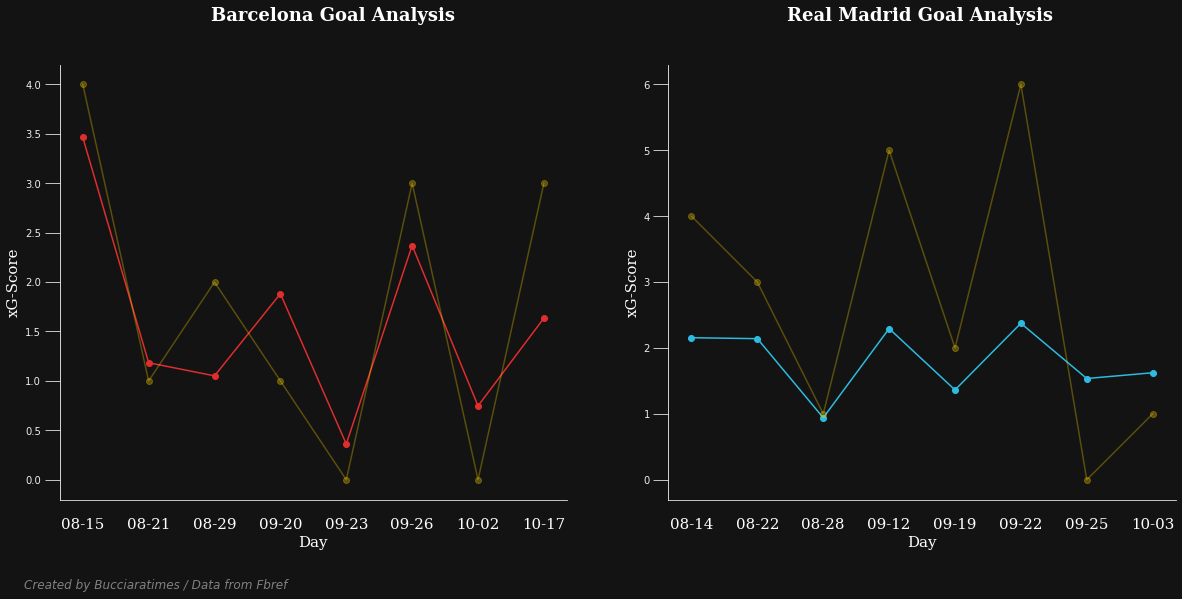

<Figure size 432x288 with 0 Axes>

In [212]:
fig,axes = plt.subplots(1,2,figsize = (20,8))

ax = axes[0]
ax2 = axes[1]

#Define a font
hfont = {'fontname':'serif'}

#Change the background color
fig.set_facecolor("#131313")
ax.patch.set_facecolor("#131313")
ax.set_zorder(1)

ax2.patch.set_facecolor("#131313")
ax2.set_zorder(1)

#Change the ticks color
ax.tick_params(colors="#ededed", length=15, bottom=False, labelbottom = True)
ax2.tick_params(colors="#ededed", length=15, bottom=False, labelbottom = True)


ax.set_xticks([0,1,2,3,4,5,6,7]) 
ax.set_xticklabels(newD,color="w", fontsize=15 , **hfont)

ax2.set_xticks([0,1,2,3,4,5,6,7]) 
ax2.set_xticklabels(newD2 ,color="w", fontsize=15 , **hfont)


#Change the axes color and hide some axes
ax.spines['bottom'].set_color("#ededed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

ax2.spines['bottom'].set_color("#ededed")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

# Plot the GA
# plt.plot(num_match, xG_rolling , zorder=2, color="#BE4B4B", linewidth=1.5)
ax.plot(num_match, xG, zorder=2, color="#E02D2D", linewidth=1.5,marker="o")
ax.plot(num_match, score, zorder=2, color="gold", linewidth=1.5, marker="o",alpha=.3)


# Plot the xGA
# plt.plot(num_match, xGA_rolling, zorder=2, color="#98DBE3", linewidth=1.5)
# ax.plot(num_match, xGA, zorder=2, color="#2DBCE0", linewidth=1.5)



ax2.plot(num_match2, xG2, zorder=2, color="#2DBCE0", linewidth=1.5, marker="o")
# ax2.plot(num_match2, xGA_diff2, zorder=2, color="#2DBCE0", linewidth=1.5)
ax2.plot(num_match, score2, zorder=2, color="gold", linewidth=1.5, marker="o",alpha=.3)


#Fill between axes to visualize difference between the two plots
# ax.fill_between(num_match,xG_rolling, xGA_rolling, where=xG_rolling >= xGA_rolling, facecolor="#E02D2D", interpolate=True)
# ax.fill_between(num_match,xG_rolling, xGA_rolling, where=xGA_rolling >= xG_rolling, facecolor="#222DC5", interpolate=True)
# ax.fill_between(num_match, xG_diff, xGA_diff, where=xG_diff >= xGA_diff, facecolor="#E02D2D", interpolate=True)
# ax.fill_between(num_match, xG_diff, xGA_diff, where=xGA_diff >= xG_diff, facecolor="#2DE0C5", interpolate=True)

# Axes Label
ax.set_ylabel("xG-Score", color="w", fontsize=15 , **hfont)
ax.set_xlabel("Day", color="w", fontsize=15 , **hfont)

ax2.set_ylabel("xG-Score", color="w", fontsize=15 , **hfont)
ax2.set_xlabel("Day", color="w", fontsize=15 , **hfont)

# Title and credits
fig.text(0.23,0.92, "Barcelona Goal Analysis \n", fontsize=18, fontweight="bold", color = "w", **hfont)
fig.text(0.63,0.92, "Real Madrid Goal Analysis \n", fontsize=18, fontweight="bold", color = "w", **hfont)

#Use highlighttext library to add color in our title
# fig_text(x=0.12, y=0.94, s="Rolling <Goals Against> and <xGA> | Premier League & Champions League | 2017/2018 - 2019/2020", highlight_textprops=[{"color":"#2bb6e0"}, {'color':"#8A0F77"}], color="w", fontweight="light", fontsize=12, zorder=2)

fig.text(0.1, -.03, "Created by Bucciaratimes / Data from Fbref",fontstyle="italic",fontsize=12, color="gray")

# # Split the graph in seasons
# # 17/18
# first_season = ax.text(8, 0.1, "17/18", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)

# # 18/19
# second_season = ax.text(43, 0.1, "18/19", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
# ax.axvline(x=39, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# #19/20
# third_season = ax.text(94, 0.1, "19/20", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
# ax.axvline(x=90, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# # Split the graph in goalkeepers era
# karius_mignolet = ax.text(25, 1.50, "Karius\nMignolet", fontsize=17, ha="center", color="w",alpha=1 , **hfont)
# alisson_1 = ax.text(65, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

# adrian = ax.text(95.5, 1.45, "Adrián", fontsize=17, ha="center", color="w",alpha=1 , rotation=90, **hfont)
# ax.axvline(x=91, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
# ax.axvline(x=100, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

# alisson_2 = ax.text(113, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

# ax.axvline(x=125, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
# ax.axvline(x=126, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

# alisson_3 = ax.text(133, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)



plt.savefig(f'/work/output/plote.png', dpi=200, bbox_inches="tight",facecolor="#131313")

plt.show()
plt.tight_layout()

In [71]:
df_barca["npxG"].mean()

2.0529603947368424

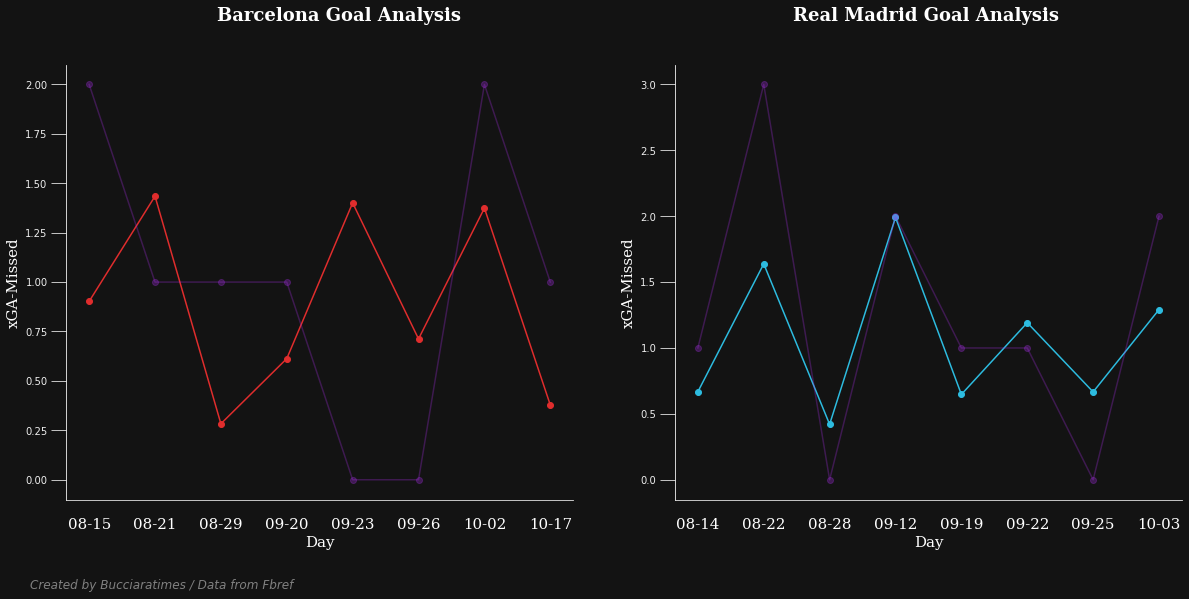

<Figure size 432x288 with 0 Axes>

In [213]:
fig,axes = plt.subplots(1,2,figsize = (20,8))

ax = axes[0]
ax2 = axes[1]

#Define a font
hfont = {'fontname':'serif'}

#Change the background color
fig.set_facecolor("#131313")
ax.patch.set_facecolor("#131313")
ax.set_zorder(1)

ax2.patch.set_facecolor("#131313")
ax2.set_zorder(1)

#Change the ticks color
ax.tick_params(colors="#ededed", length=15, bottom=False, labelbottom = True)
ax2.tick_params(colors="#ededed", length=15, bottom=False, labelbottom = True)


ax.set_xticks([0,1,2,3,4,5,6,7]) 
ax.set_xticklabels(newD,color="w", fontsize=15 , **hfont)

ax2.set_xticks([0,1,2,3,4,5,6,7]) 
ax2.set_xticklabels(newD2 ,color="w", fontsize=15 , **hfont)


#Change the axes color and hide some axes
ax.spines['bottom'].set_color("#ededed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

ax2.spines['bottom'].set_color("#ededed")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

# Plot the GA
# plt.plot(num_match, xG_rolling , zorder=2, color="#BE4B4B", linewidth=1.5)
ax.plot(num_match, xGA, zorder=2, color="#E02D2D", linewidth=1.5,marker="o")
ax.plot(num_match, data["missed"], zorder=2, color="#A22DE0", linewidth=1.5, marker="o",alpha=.3)


# Plot the xGA
# plt.plot(num_match, xGA_rolling, zorder=2, color="#98DBE3", linewidth=1.5)
# ax.plot(num_match, xGA, zorder=2, color="#2DBCE0", linewidth=1.5)



ax2.plot(num_match2, xGA2, zorder=2, color="#2DBCE0", linewidth=1.5, marker="o")
# ax2.plot(num_match2, xGA_diff2, zorder=2, color="#2DBCE0", linewidth=1.5)
ax2.plot(num_match2, data2["missed"], zorder=2, color="#A22DE0", linewidth=1.5, marker="o",alpha=.3)


#Fill between axes to visualize difference between the two plots
# ax.fill_between(num_match,xG_rolling, xGA_rolling, where=xG_rolling >= xGA_rolling, facecolor="#E02D2D", interpolate=True)
# ax.fill_between(num_match,xG_rolling, xGA_rolling, where=xGA_rolling >= xG_rolling, facecolor="#222DC5", interpolate=True)
# ax.fill_between(num_match, xG_diff, xGA_diff, where=xG_diff >= xGA_diff, facecolor="#E02D2D", interpolate=True)
# ax.fill_between(num_match, xG_diff, xGA_diff, where=xGA_diff >= xG_diff, facecolor="#2DE0C5", interpolate=True)

# Axes Label
ax.set_ylabel("xGA-Missed", color="w", fontsize=15 , **hfont)
ax.set_xlabel("Day", color="w", fontsize=15 , **hfont)

ax2.set_ylabel("xGA-Missed", color="w", fontsize=15 , **hfont)
ax2.set_xlabel("Day", color="w", fontsize=15 , **hfont)

# Title and credits
fig.text(0.23,0.92, "Barcelona Goal Analysis \n", fontsize=18, fontweight="bold", color = "w", **hfont)
fig.text(0.63,0.92, "Real Madrid Goal Analysis \n", fontsize=18, fontweight="bold", color = "w", **hfont)

#Use highlighttext library to add color in our title
# fig_text(x=0.12, y=0.94, s="Rolling <Goals Against> and <xGA> | Premier League & Champions League | 2017/2018 - 2019/2020", highlight_textprops=[{"color":"#2bb6e0"}, {'color':"#8A0F77"}], color="w", fontweight="light", fontsize=12, zorder=2)

fig.text(0.1, -.03, "Created by Bucciaratimes / Data from Fbref",fontstyle="italic",fontsize=12, color="gray")

# # Split the graph in seasons
# # 17/18
# first_season = ax.text(8, 0.1, "17/18", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)

# # 18/19
# second_season = ax.text(43, 0.1, "18/19", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
# ax.axvline(x=39, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# #19/20
# third_season = ax.text(94, 0.1, "19/20", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
# ax.axvline(x=90, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# # Split the graph in goalkeepers era
# karius_mignolet = ax.text(25, 1.50, "Karius\nMignolet", fontsize=17, ha="center", color="w",alpha=1 , **hfont)
# alisson_1 = ax.text(65, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

# adrian = ax.text(95.5, 1.45, "Adrián", fontsize=17, ha="center", color="w",alpha=1 , rotation=90, **hfont)
# ax.axvline(x=91, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
# ax.axvline(x=100, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

# alisson_2 = ax.text(113, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

# ax.axvline(x=125, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
# ax.axvline(x=126, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

# alisson_3 = ax.text(133, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)



plt.savefig(f'/work/output/plote2.png', dpi=200, bbox_inches="tight",facecolor="#131313")
plt.show()
plt.tight_layout()